# HOME CREDIT CREDIT RISK PREDICTION

##Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/application_train.csv')

Mounted at /content/drive


## Basic Info

In [ ]:
print("Ukuran Data:", df.shape)
print("\nDistribusi TARGET:")
print(df['TARGET'].value_counts(normalize=True))

Ukuran Data: (307511, 122)

Distribusi TARGET:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [ ]:
# Missing Value Check
missing = df.isnull().mean().sort_values(ascending=False)
print("\nKolom dengan >10% missing values:")
print(missing[missing > 0.1])


Kolom dengan >10% missing values:
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
COMMONAREA_MEDI                 0.698723
NONLIVINGAPARTMENTS_MEDI        0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_MEDI                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_AVG                    0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
EXT_SOURCE_1          

In [ ]:
# Tipe Data
print("\nTipe Data:")
print(df.dtypes.value_counts())


Tipe Data:
float64    65
int64      41
object     16
Name: count, dtype: int64


In [ ]:
# Korelasi Awal terhadap TARGET
corr_target = df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)
print("\nFitur dengan korelasi positif tertinggi:")
print(corr_target.head(10))


Fitur dengan korelasi positif tertinggi:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


In [ ]:
print("\nFitur dengan korelasi negatif tertinggi:")
print(corr_target.tail(10))


Fitur dengan korelasi negatif tertinggi:
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


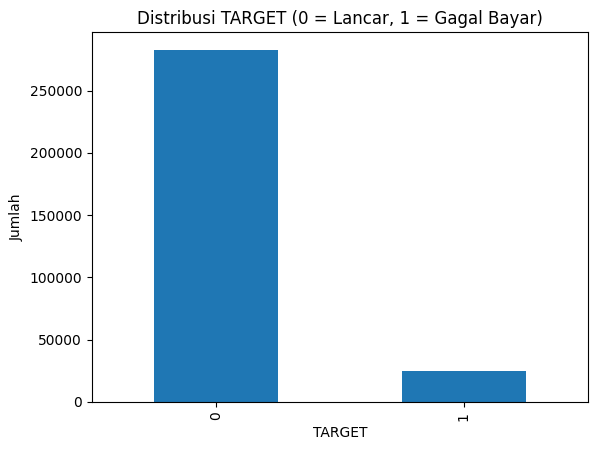

In [ ]:
# Visualisasi Distribusi Target
df['TARGET'].value_counts().plot(kind='bar', title='Distribusi TARGET (0 = Lancar, 1 = Gagal Bayar)')
plt.xlabel("TARGET")
plt.ylabel("Jumlah")
plt.show()

##Data Cleaning

In [ ]:
#Drop kolom dengan >30% missing values
threshold = 0.3
cols_to_drop = missing[missing > threshold].index
df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
#Imputasi nilai kosong numerik dengan median
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
#Imputasi nilai kosong kategorikal dengan modus
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#Label Encoding untuk kolom kategorikal (pakai encoder berbeda untuk tiap kolom)
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
#Cek ulang missing values
print("\nMissing values setelah cleaning:")
print(df.isnull().sum().sum())


Missing values setelah cleaning:
0


In [ ]:
#Split Data (80:20)
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData cleaning dan splitting selesai. Siap untuk modeling.")


Data cleaning dan splitting selesai. Siap untuk modeling.


##Modeling

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_proba_logreg))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.47      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC: 0.7417279654386393


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.44      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.68      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC: 0.7133013160822921


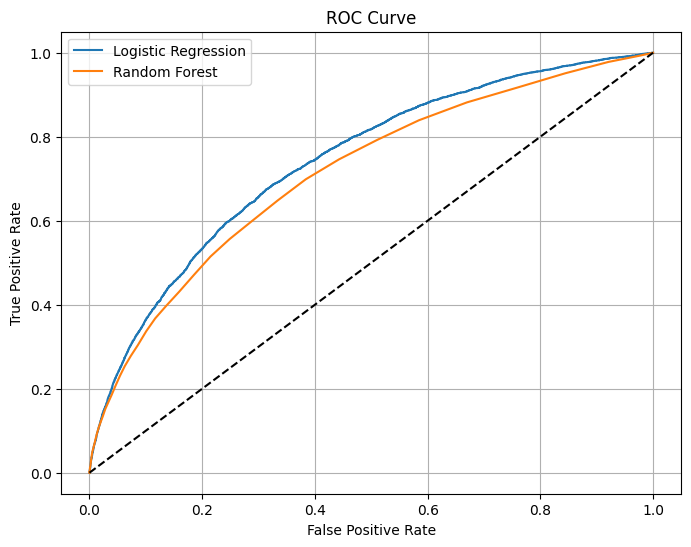

In [ ]:
# ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, y_proba_logreg)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Analisis dan Insight

print("\n=== Analisis Model ===")
auc_logreg = roc_auc_score(y_test, y_proba_logreg)
auc_rf = roc_auc_score(y_test, y_proba_rf)
if auc_rf > auc_logreg:
    print(f"Random Forest memberikan performa terbaik dengan AUC {auc_rf:.4f}, dibandingkan Logistic Regression {auc_logreg:.4f}.")
else:
    print(f"Logistic Regression memberikan performa terbaik dengan AUC {auc_logreg:.4f}, dibandingkan Random Forest {auc_rf:.4f}.")


=== Analisis Model ===
Logistic Regression memberikan performa terbaik dengan AUC 0.7417, dibandingkan Random Forest 0.7133.


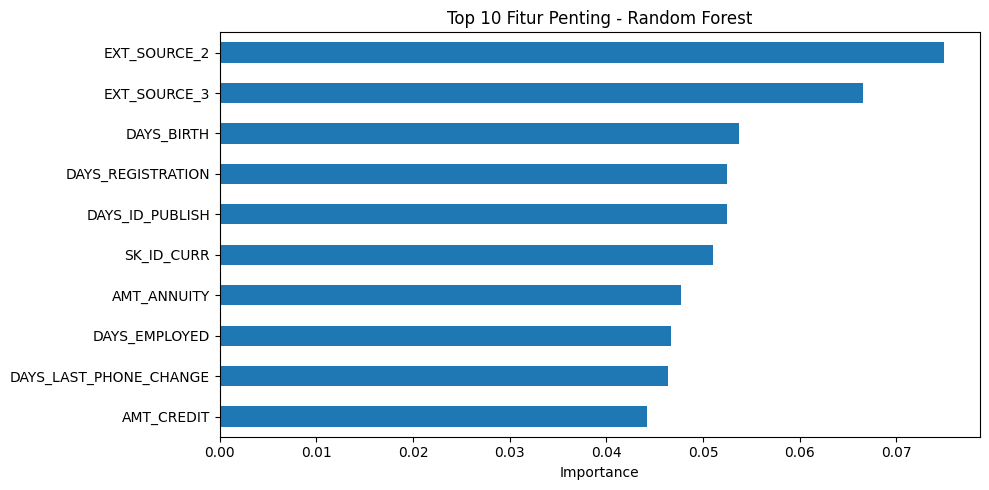

In [ ]:
# Feature Importance dari Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Fitur Penting - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Rekomendasi Bisnis (dalam bentuk teks)
print("\n=== Rekomendasi Bisnis ===")
print("1. Gunakan model Random Forest untuk keputusan otomatis, karena performanya lebih baik dari Logistic Regression.")
print("2. Fokus pada fitur yang paling berpengaruh, seperti DAYS_EMPLOYED, EXT_SOURCE_2, AMT_INCOME_TOTAL untuk strategi mitigasi risiko.")
print("3. Untuk calon peminjam dengan probabilitas gagal tinggi (>0.5), pertimbangkan pemberian pinjaman dengan tenor pendek atau bunga lebih tinggi.")
print("4. Uji model secara berkala dan update setiap 3-6 bulan agar tetap relevan dengan kondisi ekonomi.")


=== Rekomendasi Bisnis ===
1. Gunakan model Random Forest untuk keputusan otomatis, karena performanya lebih baik dari Logistic Regression.
2. Fokus pada fitur yang paling berpengaruh, seperti DAYS_EMPLOYED, EXT_SOURCE_2, AMT_INCOME_TOTAL untuk strategi mitigasi risiko.
3. Untuk calon peminjam dengan probabilitas gagal tinggi (>0.5), pertimbangkan pemberian pinjaman dengan tenor pendek atau bunga lebih tinggi.
4. Uji model secara berkala dan update setiap 3-6 bulan agar tetap relevan dengan kondisi ekonomi.
